# Travel Package Purchase: Ensemble Techniques
## By: Swaraj Tripathy

The goal of this project is to identify customers who are likely to purchase the newly introduced Wellness Tourism Package for a tourism company. I will be creating predictive models using ensemble techniques, particularly bagging and boosting, to identify customers who are likely to purchase the tourism package. By identifying customers who are likely to purchase the package, the company can target these customers more than others in order to improve sales of their tourism package.

This project aims to answer the following questions: What types of customers are likely to purchase the wellness tourism package? How accurately can our model identify these customers? What are the most important attributes about a customer that determine whether or not they will purchase the package? 

In [96]:
# import relevant packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

## Exploratory Data Analysis

In [2]:
# load in the dataset
raw_data = pd.read_excel("Tourism.xlsx", sheet_name = "Tourism")
raw_data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [3]:
# make a copy of the data to be manipulated
data = raw_data.copy()
data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [4]:
# statistical summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [5]:
# number of duplicate rows
data.duplicated().sum()

0

In [6]:
# remove duplicate rows
data = data.drop_duplicates()

In [7]:
# data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
# count missing values
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
# imputation of missing values
# for continuous numerical variables, we impute the mean
# for categorical variables, we impute the mode

# mean imputation
data["Age"].fillna(np.round(data["Age"].mean()), inplace = True)
data["DurationOfPitch"].fillna(np.round(data["DurationOfPitch"].mean()), inplace = True)
data["MonthlyIncome"].fillna(np.round(data["MonthlyIncome"].mean()), inplace = True)

# mode imputation of remaining categorical variables
data = data.fillna(data.mode().iloc[0])

In [10]:
# check if we removed all missing values
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
# check the shape of the data
data.shape

(4888, 20)

In [12]:
# balance of target variable for purchasing the package
data["ProdTaken"].value_counts(normalize = True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [13]:
# fix misentered gender entries
data["Gender"].replace("Fe Male", "Female", inplace = True)

In [14]:
# check that the correction worked
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [15]:
# convert object datatypes to categorical variables
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [16]:
# check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [17]:
# drop CustomerID
data = data.drop("CustomerID", axis = 1)

### Univariate Analysis

In [18]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

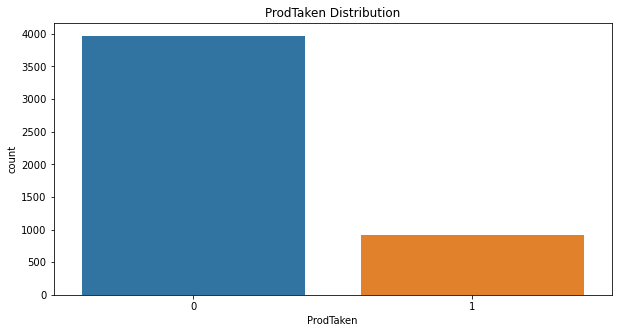

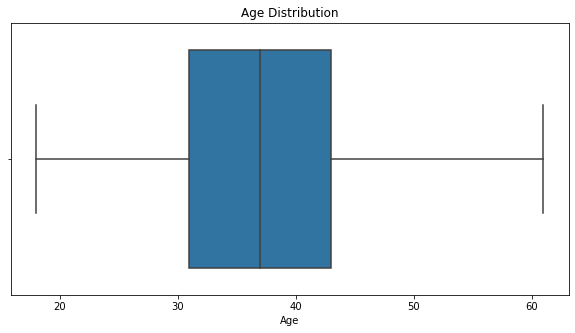

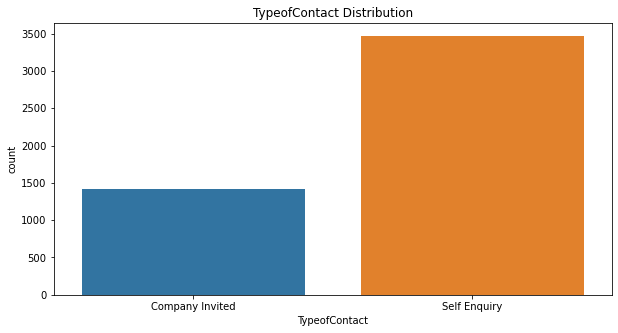

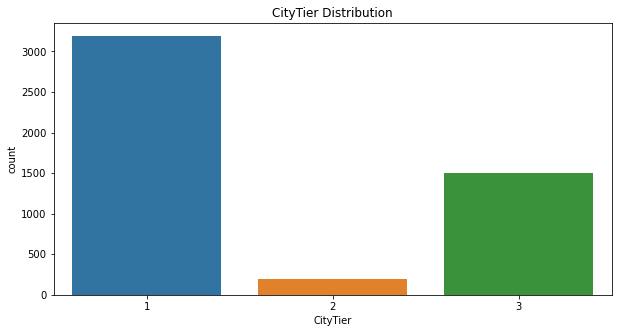

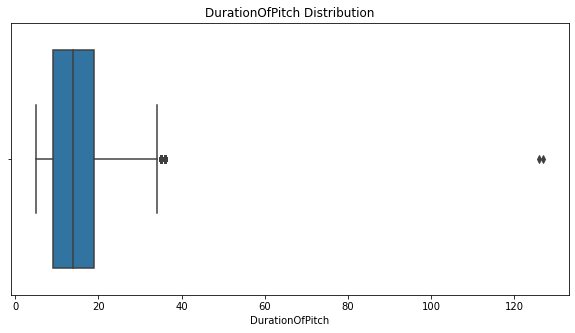

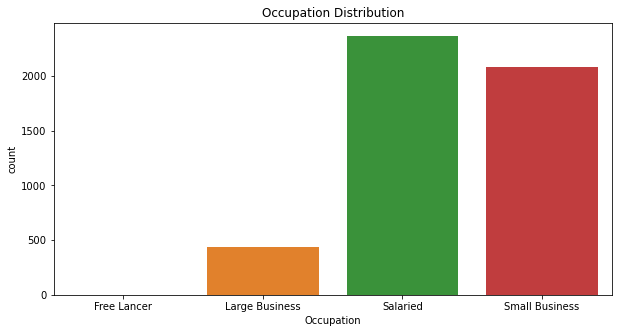

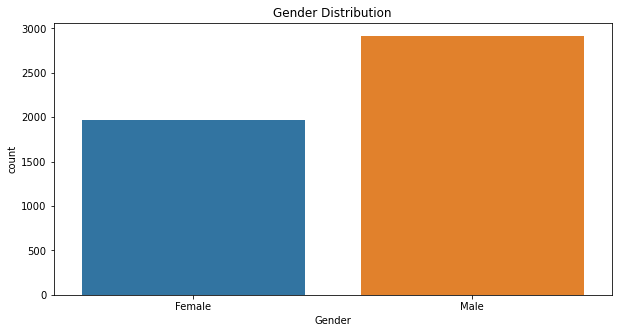

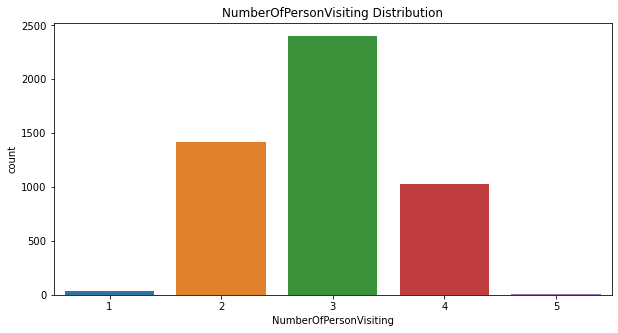

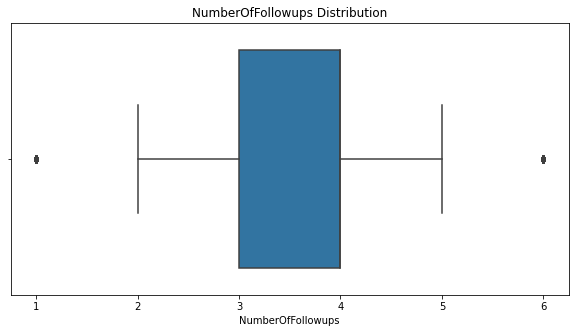

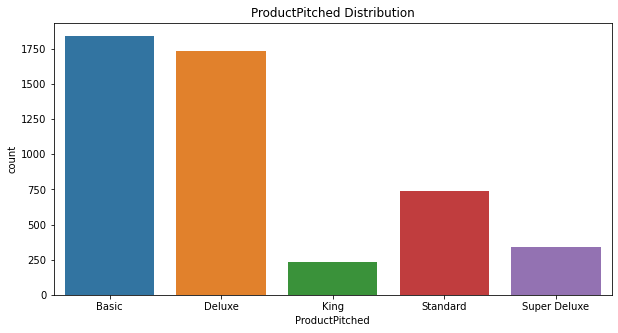

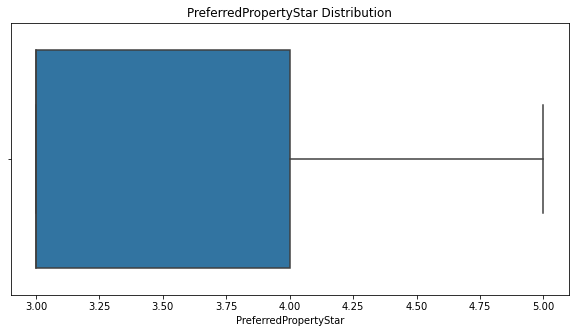

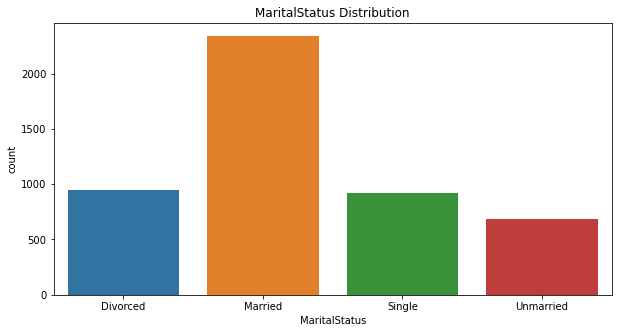

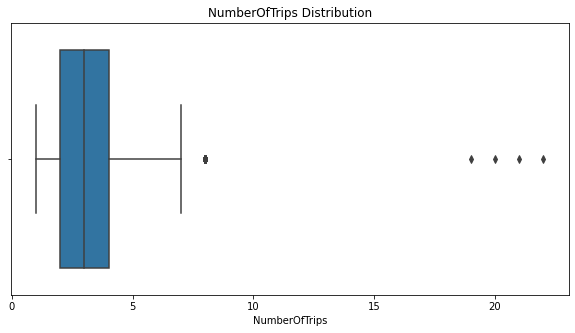

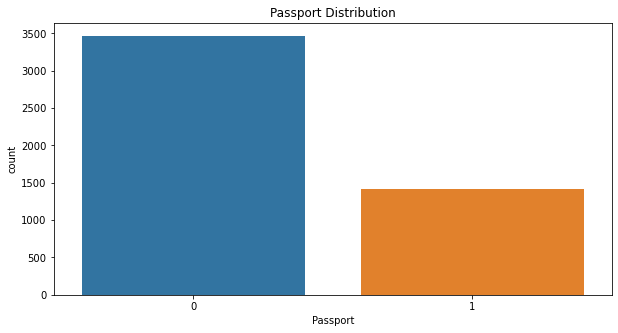

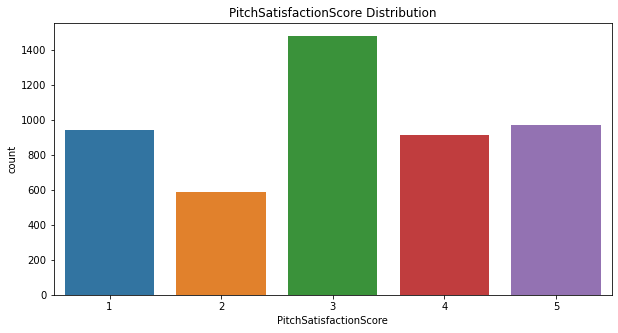

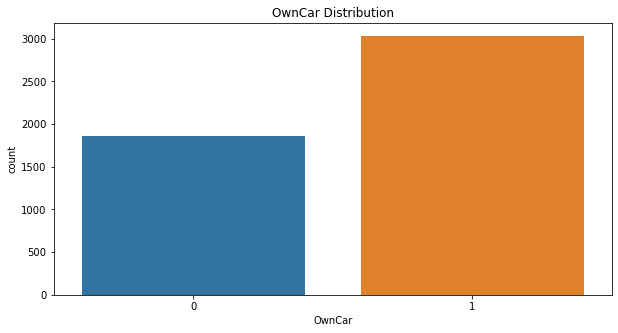

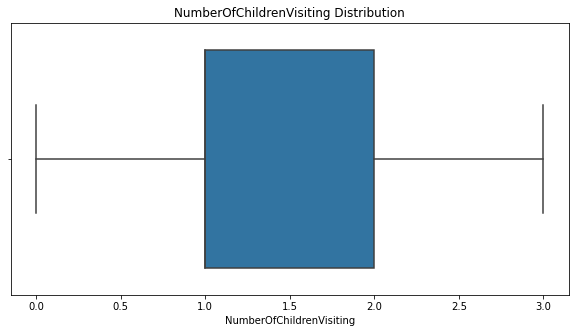

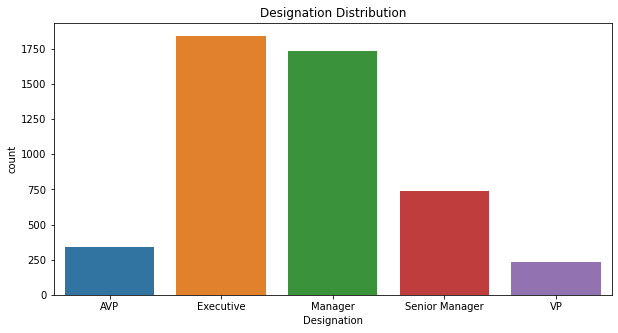

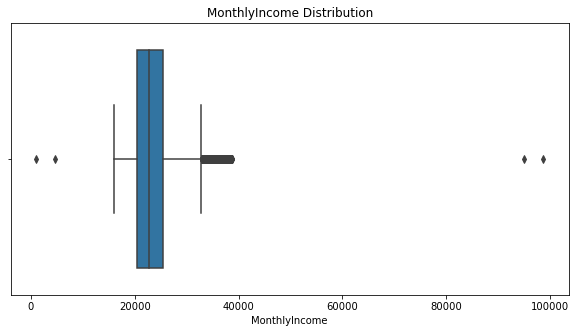

In [19]:
# create boxplots for numerical variables
# countplots for categorical variables
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'float64':
        plt.figure(figsize = (10,5))
        plt.title(feature + " Distribution")
        sns.boxplot(data = data, x = feature)
        plt.show()
    else:
        plt.figure(figsize = (10,5))
        plt.title(feature + " Distribution")
        sns.countplot(data = data, x = feature)
        plt.show()

The only unreasonable skewed outliers are those with very high Duration of Pitch and very high Monthly Income, so we will remove those data points. We will not be losing much data by removing these rows. All other outliers are reasonable and are ok to be left in for this analysis.

In [20]:
# investigate outlier rows
data[data["DurationOfPitch"] > 100]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,38.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [21]:
# investigate outlier rows
data[data["MonthlyIncome"] > 80000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [22]:
# remove outlier rows
data = data.drop([1434, 3878, 38, 2482], axis = 0)

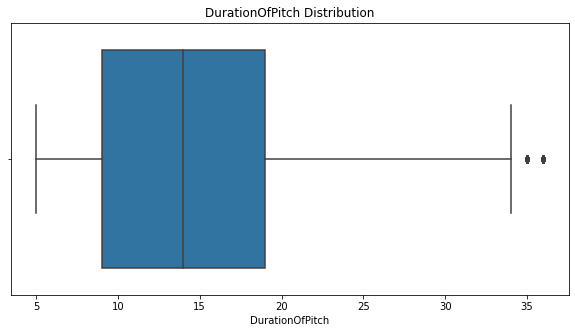

In [23]:
# check distribution after removing outliers
plt.figure(figsize = (10,5))
plt.title("DurationOfPitch Distribution")
sns.boxplot(data = data, x = "DurationOfPitch");

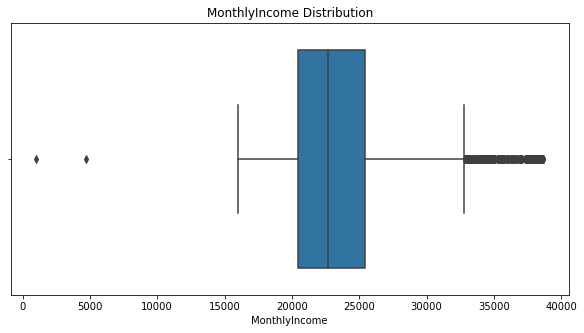

In [24]:
# check distribution after removing outliers
plt.figure(figsize = (10,5))
plt.title("MonthlyIncome Distribution")
sns.boxplot(data = data, x = "MonthlyIncome");

Insights:
- Only about 20% of customers purchased the package
- The age distribution has no outliers
- Over half of the customers live in the nicest city tier
- Over 75% of customers had sales pitches of less than 20 minutes
- The number of visiting people is nearly normally distributed
- Nobody preferred a star rating of less than 3 stars
- Over 75% of customers take less than 5 trips a year on average
- The largest pitch satisfaction score category was 3/5
- The number of children visiting ranged from 0-3 for the entire dataset
- Over 50% of customers had a monthly income between 20000 and 30000

### Bivariate Analysis

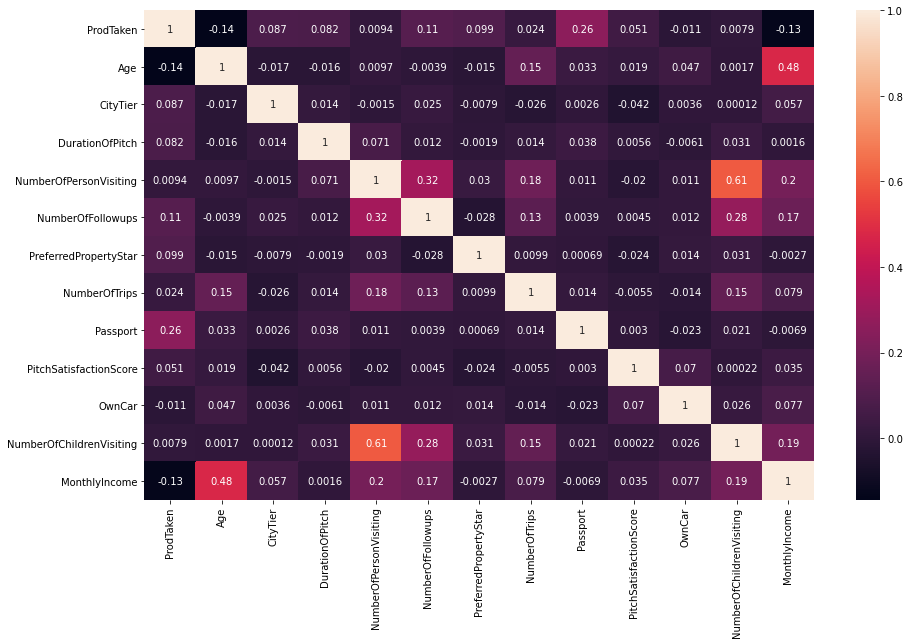

In [26]:
# heatmap for correlations between variables
plt.figure(figsize = (15, 9))
sns.heatmap(data.corr(), annot = True);

- None of the variables have a particularly strong correlation with the target variable
- Age has a relatively strong correlation with monthly income, which makes sense
- Number of people wisiting is also fairly strongly correlated with number of children visiting, which is intuitive

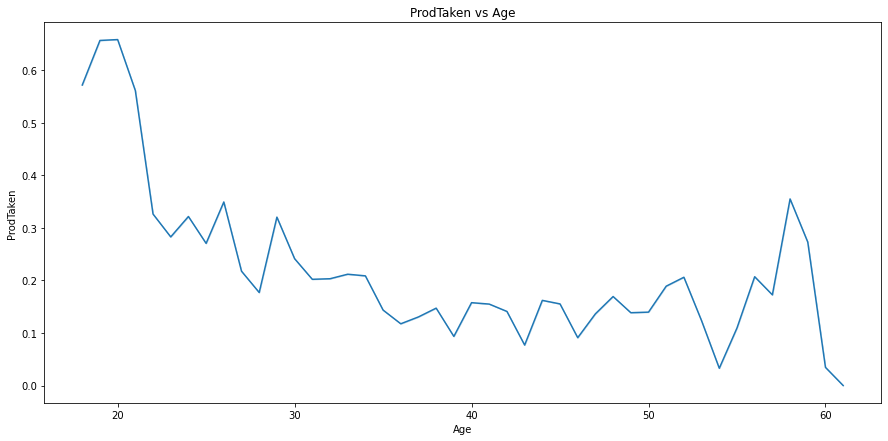

In [32]:
# Prod Taken vs Age
plt.figure(figsize = (15,7))
plt.title("ProdTaken vs Age")
sns.lineplot(data = data, y = "ProdTaken", x = "Age", ci = False);

- Overall as age increases, customers are less likely to purchase the package
- Customers under 30 have a much higher tendency to purchase the package
- Some older customers from 55-60 tend to purchase the package more than others of similar age

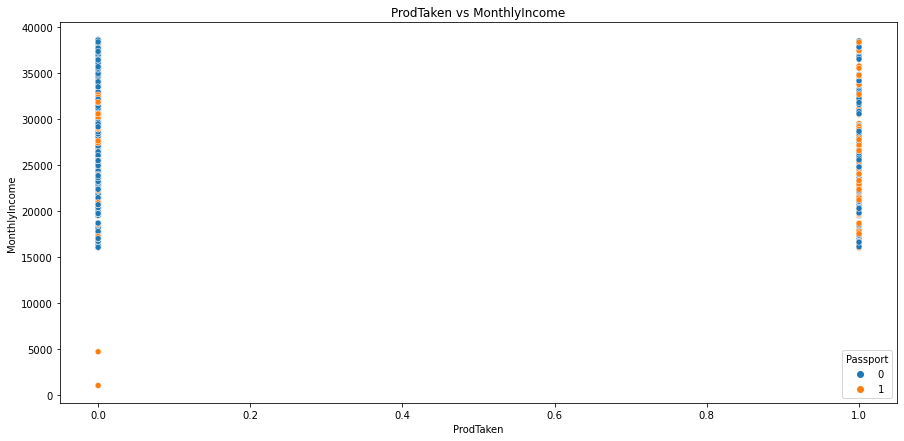

In [36]:
# Prod Taken vs Monthly Income
plt.figure(figsize = (15,7))
plt.title("ProdTaken vs MonthlyIncome")
sns.scatterplot(data = data, x = "ProdTaken", y = "MonthlyIncome", hue = "Passport");

- People with passports tended to purchase the package more often
- Income does not seem to have much of a relationship with purchasing the package, although all customers with monthly income of less than 15000 did not purchase the package or have passports

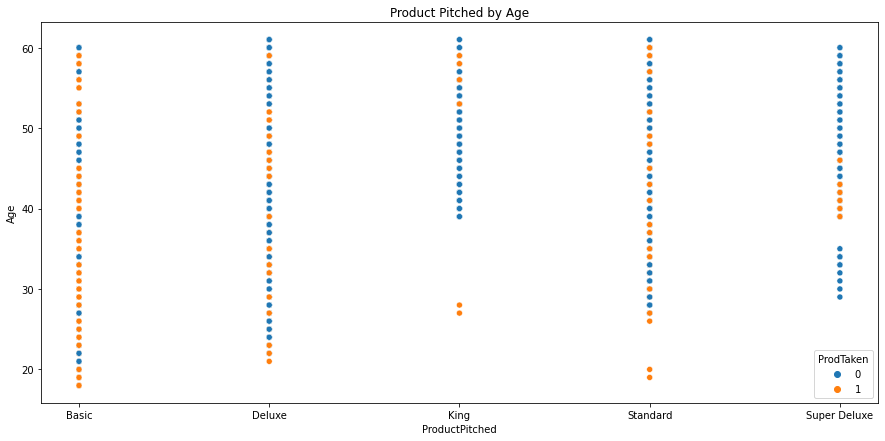

In [44]:
# Product pitched by age
plt.figure(figsize = (15,7))
plt.title("Product Pitched by Age")
sns.scatterplot(data = data, x = "ProductPitched", y = "Age", hue = "ProdTaken");

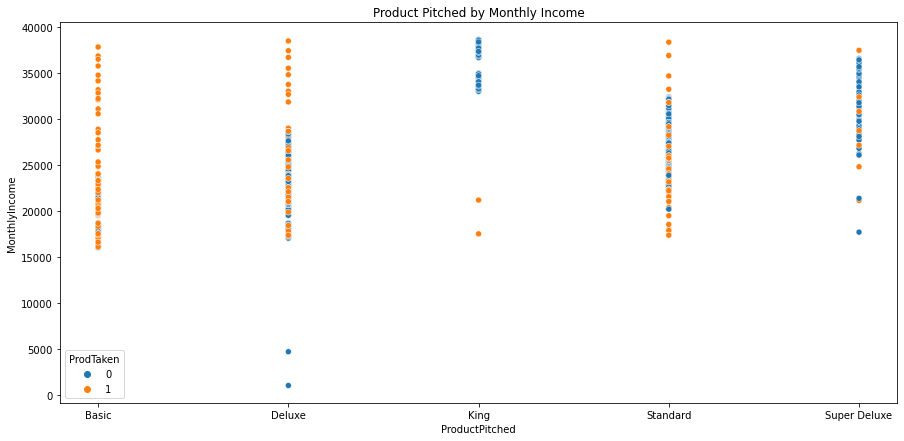

In [43]:
# Product pitched by Monthly Income
plt.figure(figsize = (15,7))
plt.title("Product Pitched by Monthly Income")
sns.scatterplot(data = data, x = "ProductPitched", y = "MonthlyIncome", hue = "ProdTaken");

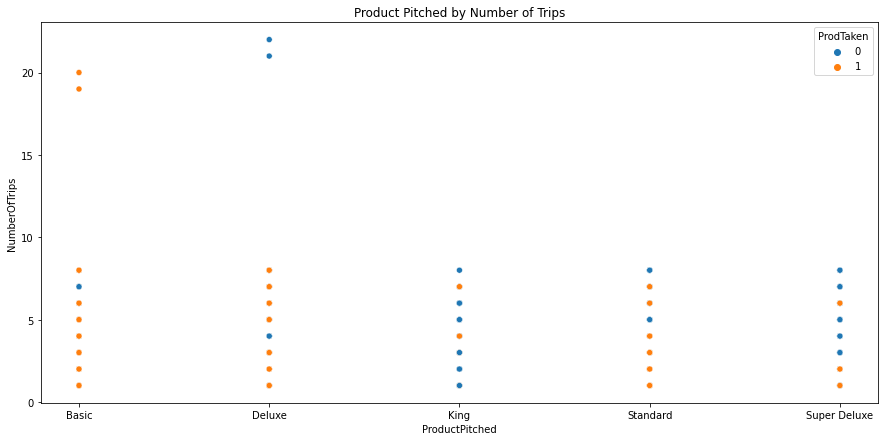

In [45]:
# Product pitched by number of trips
plt.figure(figsize = (15,7))
plt.title("Product Pitched by Number of Trips")
sns.scatterplot(data = data, x = "ProductPitched", y = "NumberOfTrips", hue = "ProdTaken");

- People who take many trips per year were offered basic or deluxe packages
- Most people took the basic package when ptched, while very few took the king package
- Monthly income did not play much of a role in what package was pitched to the customer except for the king package
- Customers under 30 were typically only pitched the basic, standard, or deluxe packages

## Model Building: Bagging Models

In [46]:
# we first split the data into predictors and target datasets
X = data.drop("ProdTaken" , axis=1)
y = data.pop("ProdTaken")

In [51]:
# generate dummy variables for the categorical variables
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["category"]).columns.tolist(),
    drop_first = True,
)

In [52]:
# split the data into test and train sets with 20% in test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 1, stratify = y)

In [53]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Decision Tree Model

In [55]:
# fit the default decision tree model
dtree = DecisionTreeClassifier(random_state = 1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
# check metrics scores
dtree_score = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9119754350051177
Recall on training set :  1.0
Recall on test set :  0.75
Precision on training set :  1.0
Precision on test set :  0.7752808988764045


We are most interested in identifying all customers who are likely to purchase the new package. This means the performance metric we care most about is recall. Recall factors in false negatives in the calculation, which is when the model predict that a customer will not purchase the package when they actually will, which is a more costly error in this project than false positives. Going forward, we will look to maximize recall in our models.

This model has perfect recall on the training set, but only 75% recall on the test set. This is an indication of overfitting, although the performance is decent.

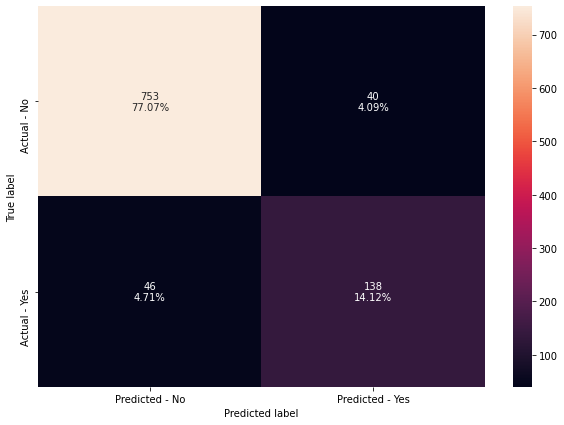

In [58]:
# confusion matrix on test set
make_confusion_matrix(dtree, y_test)

In [88]:
# gini importance of features, calculated by the normalised reduction in gini impurity for each feature
print(
    pd.DataFrame(
        dtree.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
DurationOfPitch              0.170303
Age                          0.135893
MonthlyIncome                0.089577
NumberOfTrips                0.079026
Passport                     0.069670
Designation_Executive        0.068645
PitchSatisfactionScore       0.057585
CityTier                     0.043435
NumberOfFollowups            0.041040
Gender_Male                  0.027989
MaritalStatus_Single         0.026866
PreferredPropertyStar        0.026410
NumberOfChildrenVisiting     0.022771
TypeofContact_Self Enquiry   0.021990
MaritalStatus_Unmarried      0.019174
OwnCar                       0.016027
MaritalStatus_Married        0.013957
Occupation_Large Business    0.013657
NumberOfPersonVisiting       0.011012
ProductPitched_Deluxe        0.008526
Occupation_Salaried          0.008430
Designation_Senior Manager   0.007008
ProductPitched_Standard      0.006250
Designation_Manager          0.005471
Occupation_Small Business    0.005222
ProductPitch

Let's try hyperparameter tuning the model with GridSearchCV

In [66]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [3, 5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
    "class_weight": [{0: 0.80, 1: 0.20}]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2},
                       min_impurity_decrease=1e-05, random_state=1)

In [67]:
# check metrics scores
dtree_tuned_score = get_metrics_score(dtree_tuned)

Accuracy on training set :  0.9892500639877143
Accuracy on test set :  0.9048106448311156
Recall on training set :  0.9429347826086957
Recall on test set :  0.7065217391304348
Precision on training set :  1.0
Precision on test set :  0.7692307692307693


This model actually has worse recall on the test set than the default model. However, the recall on the training set is also slightly reduced, indicating that we have reduced the overfitting of this model slightly.

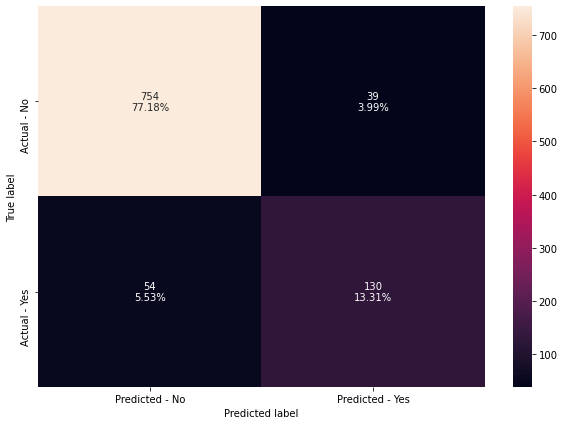

In [68]:
# confusion matrix on test set
make_confusion_matrix(dtree_tuned, y_test)

In [87]:
# gini importance of features, calculated by the normalised reduction in gini impurity for each feature
print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
DurationOfPitch              0.156806
Age                          0.141545
MonthlyIncome                0.132753
NumberOfTrips                0.071560
PitchSatisfactionScore       0.059458
CityTier                     0.041005
Designation_Executive        0.040061
NumberOfFollowups            0.039809
MaritalStatus_Single         0.036506
TypeofContact_Self Enquiry   0.031476
Gender_Male                  0.031445
NumberOfPersonVisiting       0.028415
Passport                     0.027618
NumberOfChildrenVisiting     0.025851
Occupation_Large Business    0.025315
PreferredPropertyStar        0.024893
MaritalStatus_Unmarried      0.017444
Occupation_Salaried          0.016912
Occupation_Small Business    0.012297
ProductPitched_Deluxe        0.009507
OwnCar                       0.008528
ProductPitched_Standard      0.008267
MaritalStatus_Married        0.006608
Designation_VP               0.004017
Designation_Manager          0.001906
ProductPitch

### Bagging Classifier Model

In [76]:
# fit the default bagging estimator
bagging_estimator = BaggingClassifier(random_state = 1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [78]:
# metrics scores 
bagging_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9930893268492449
Accuracy on test set :  0.925281473899693
Recall on training set :  0.96875
Recall on test set :  0.6739130434782609
Precision on training set :  0.9944211994421199
Precision on test set :  0.9051094890510949


The default estimator has lower recall on the test set than either decision tree model.

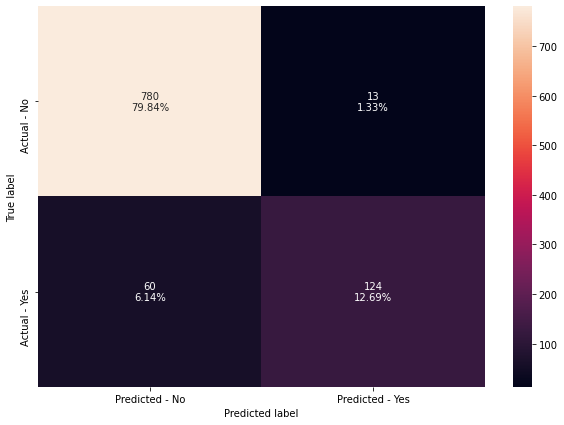

In [79]:
# confusion matrix
make_confusion_matrix(bagging_estimator, y_test)

Let's try hyperparameter tuning again to see if we can improve the performance of the model.

In [97]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'base_estimator': [dtree, LogisticRegression(random_state = 1)],
              'max_samples': [0.7, 0.8, 0.9, 1], 
              'max_features': [0.7, 0.8, 0.9, 1],
              'n_estimators' : [10, 20, 30, 40, 50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [98]:
# metrics scores 
bagging_tuned_score = get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997440491425647
Accuracy on test set :  0.9263050153531218
Recall on training set :  0.998641304347826
Recall on test set :  0.6630434782608695
Precision on training set :  1.0
Precision on test set :  0.9242424242424242


The tuned model performed slightly worse than the default model. There also seems to be additional overfitting in this model.

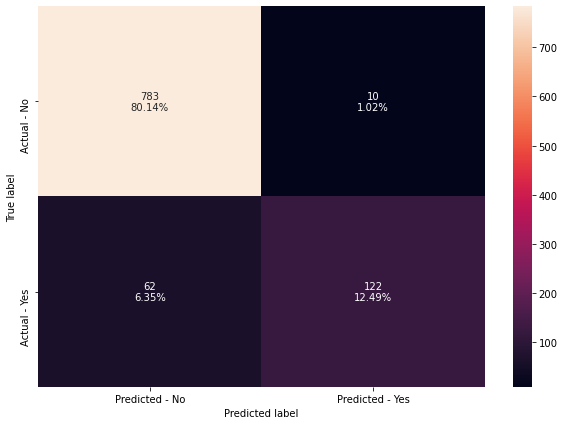

In [99]:
# confusion matrix
make_confusion_matrix(bagging_estimator_tuned, y_test)

### Random Forest Model

We will try tuning the model initially to get the best model straight away using the random forest algorithm.

In [101]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150, 200, 250],
              "min_samples_leaf": np.arange(5, 10),
              "max_features": np.arange(0.2, 0.7, 0.1),
              "max_samples": np.arange(0.3, 0.7, 0.1),
              "class_weight": [{0: 0.8, 1: 0.2}],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [102]:
# metrics scores 
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.8663936524187356
Accuracy on test set :  0.8515864892528148
Recall on training set :  0.29483695652173914
Recall on test set :  0.24456521739130435
Precision on training set :  0.9863636363636363
Precision on test set :  0.8823529411764706


Although this model has reduced the overfitting, which random forest models are known for, the performance has dropped significantly, and the recall is much lower than all other models so far.

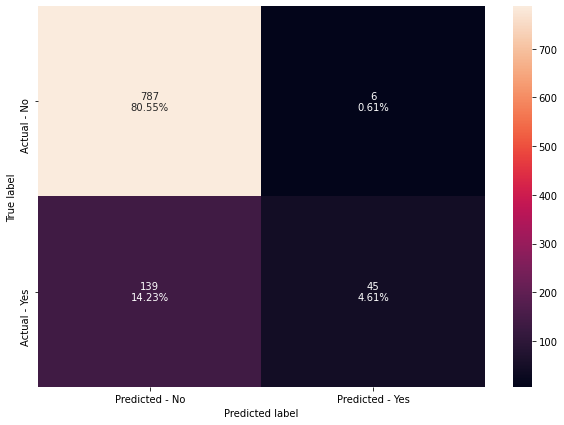

In [103]:
# confusion matrix
make_confusion_matrix(rf_estimator_tuned, y_test)

In [104]:
# gini importance of features, calculated by the normalised reduction in gini impurity for each feature
print(
    pd.DataFrame(
        rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
Age                          0.153314
MonthlyIncome                0.127769
DurationOfPitch              0.125019
Passport                     0.075820
NumberOfTrips                0.059751
Designation_Executive        0.053491
NumberOfFollowups            0.053422
PitchSatisfactionScore       0.050948
CityTier                     0.046998
MaritalStatus_Single         0.034463
PreferredPropertyStar        0.033081
TypeofContact_Self Enquiry   0.022729
MaritalStatus_Unmarried      0.019485
OwnCar                       0.017304
Gender_Male                  0.017207
NumberOfPersonVisiting       0.016947
Occupation_Small Business    0.016690
NumberOfChildrenVisiting     0.015657
Occupation_Large Business    0.013695
MaritalStatus_Married        0.013284
Occupation_Salaried          0.013017
Designation_Manager          0.006534
ProductPitched_Deluxe        0.005279
Designation_Senior Manager   0.003118
ProductPitched_Standard      0.002738
ProductPitch

In [105]:
# comparing model performance of bagging models
# defining list of models
models = [dtree, dtree_tuned, bagging_estimator, bagging_estimator_tuned, rf_estimator_tuned,
          ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [106]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree with default parameters','Tuned Decision Tree',
                                        'Bagging Classifier with default parameters', 'Tuned Bagging Classifier', 
                                         'Tuned Random Forest Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with default parameters,1.00,0.91,1.00,0.75,1.00,0.78
1,Tuned Decision Tree,0.99,0.90,0.94,0.71,1.00,0.77
2,Bagging Classifier with default parameters,0.99,0.93,0.97,0.67,0.99,0.91
3,Tuned Bagging Classifier,1.00,0.93,1.00,0.66,1.00,0.92
4,Tuned Random Forest Classifier,0.87,0.85,0.29,0.24,0.99,0.88


- The most important features seem to be Age, Monthly Income, and Duration of Pitch
- Interestingly, the the decision tree models had the highest test recall, but were still overfitting

## Model Building: Boosting Models

### Adaboost Model

In [107]:
# default model
abc = AdaBoostClassifier(random_state = 1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [108]:
# metrics scores
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.8487330432556949
Accuracy on test set :  0.8382804503582395
Recall on training set :  0.35190217391304346
Recall on test set :  0.33152173913043476
Precision on training set :  0.6943699731903485
Precision on test set :  0.6354166666666666


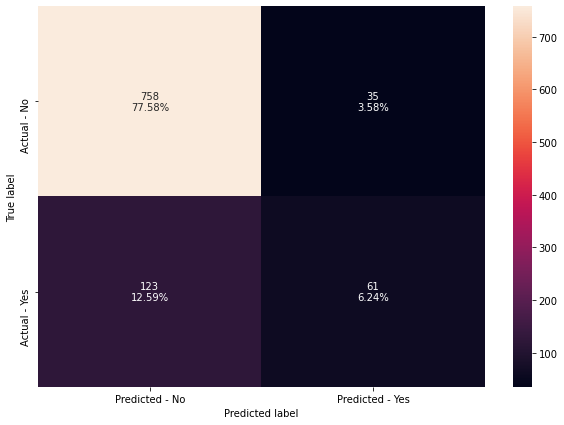

In [109]:
# confusion matrix
make_confusion_matrix(abc, y_test)

Although the Adaboost default model has low recall performance, it is not overfitting like the bagging models because the metrics scores are similar for both the training and testing sets.

### Gradient Boosting Model

In [110]:
# fit the default model
gbc = GradientBoostingClassifier(random_state = 1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [111]:
# metrics scores
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.8876375735858715
Accuracy on test set :  0.8638689866939611
Recall on training set :  0.47690217391304346
Recall on test set :  0.391304347826087
Precision on training set :  0.8666666666666667
Precision on test set :  0.7741935483870968


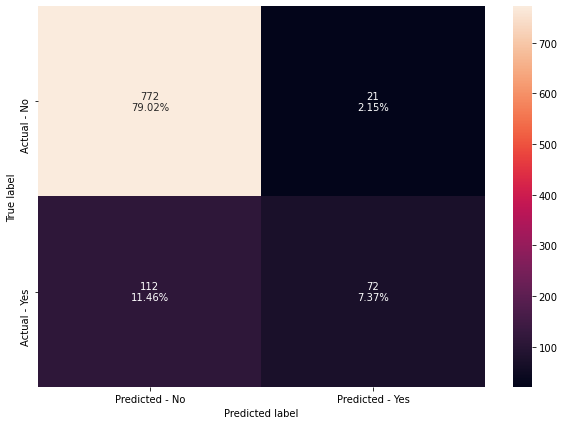

In [113]:
# confusion matrix
make_confusion_matrix(gbc, y_test)

Although the recall is a little higher in this model than with the Adaboost model, this model is overfitting a little more as the difference in performance between training and testing sets has increased.

### XGBoost Model

In [114]:
# fit the default model
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
# metrics scores
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.9992321474276938
Accuracy on test set :  0.9303991811668373
Recall on training set :  0.9959239130434783
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.881578947368421


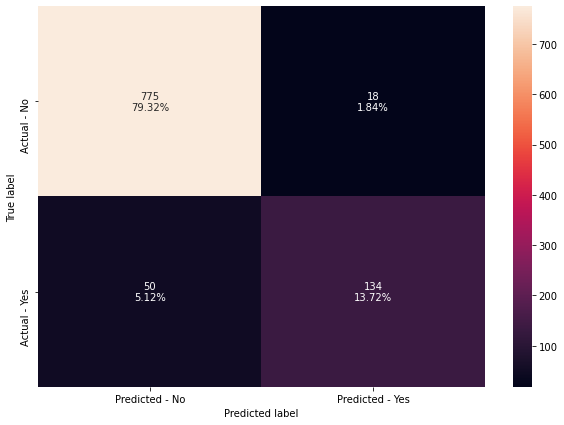

In [116]:
# confusion matrix
make_confusion_matrix(xgb, y_test)

The XGBoost model has significantly improved performance with higher recall scores, however, it is also overfitting quite a bit, which the other boosting models did not do.

Let's now try hyperparameter tuning the boosting models to try to improve their recall scores and hopefully reduce the overfitting.

### Hyperparameter Tuning Boosting Models

### Adaboost

In [117]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth = 1, random_state = 1),
                      DecisionTreeClassifier(max_depth = 2, random_state = 1),
                      DecisionTreeClassifier(max_depth = 3, random_state = 1)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.7000000000000002, n_estimators=90,
                   random_state=1)

In [118]:
# metrics scores
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.9657025851036601
Accuracy on test set :  0.8812691914022518
Recall on training set :  0.8845108695652174
Recall on test set :  0.6630434782608695
Precision on training set :  0.93
Precision on test set :  0.6931818181818182


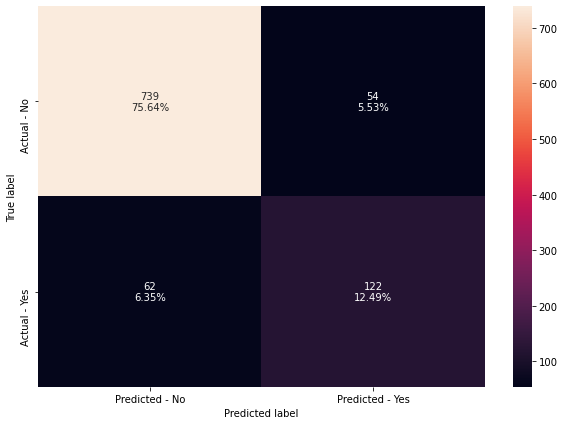

In [119]:
# confusion matrix
make_confusion_matrix(abc_tuned, y_test)

In [120]:
# feature importance
print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
MonthlyIncome                0.316485
DurationOfPitch              0.146595
Age                          0.141218
NumberOfTrips                0.055977
NumberOfFollowups            0.045085
Passport                     0.035738
PitchSatisfactionScore       0.034033
Gender_Male                  0.027437
PreferredPropertyStar        0.024363
CityTier                     0.021047
MaritalStatus_Single         0.018087
Occupation_Large Business    0.017772
TypeofContact_Self Enquiry   0.016333
OwnCar                       0.012395
Designation_Executive        0.011107
Occupation_Small Business    0.010530
MaritalStatus_Unmarried      0.010010
Occupation_Salaried          0.009755
Designation_Manager          0.007580
ProductPitched_Deluxe        0.007338
NumberOfChildrenVisiting     0.006535
ProductPitched_Standard      0.006236
ProductPitched_Super Deluxe  0.005521
NumberOfPersonVisiting       0.004820
Designation_Senior Manager   0.003347
ProductPitch

This model has much better performance when looking at recall than the default model. However it is now overfitting. I still does not perform as well as the XGBoost default model, but it overfits slightly less. The 3 most important features remain Age, Monthly Income, and Duration of Pitch.

### Gradient Boosting

In [121]:
# try using the Adaboost model as the initial estimator
gbc_init = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1),random_state = 1)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [122]:
# metrics score
gbc_init_score = get_metrics_score(gbc_init)

Accuracy on training set :  0.8884054261581776
Accuracy on test set :  0.8679631525076765
Recall on training set :  0.48641304347826086
Recall on test set :  0.41304347826086957
Precision on training set :  0.8605769230769231
Precision on test set :  0.7835051546391752


Since this model provided improved results from the default model, we will start with this as the base model and try hyperparameter tuning.

In [123]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1), random_state = 1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample":[0.8, 0.9, 1],
    "max_features":[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [124]:
# metrics scores
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9232147427693883
Accuracy on test set :  0.8812691914022518
Recall on training set :  0.6317934782608695
Recall on test set :  0.4891304347826087
Precision on training set :  0.9412955465587044
Precision on test set :  0.8035714285714286


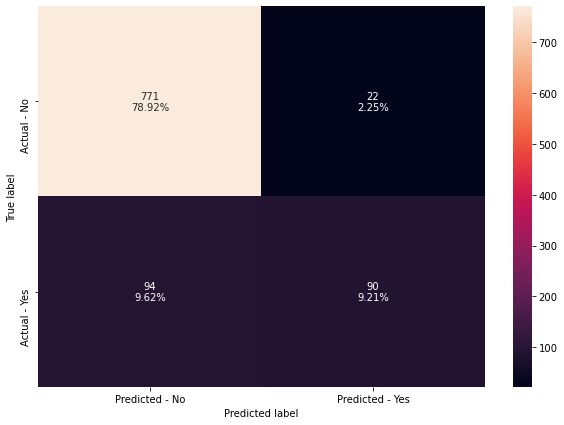

In [125]:
# confusion matrix
make_confusion_matrix(gbc_tuned, y_test)

In [126]:
# feature importance
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
MonthlyIncome                0.172592
Passport                     0.147701
Age                          0.121566
Designation_Executive        0.097681
DurationOfPitch              0.076624
NumberOfFollowups            0.056549
CityTier                     0.054466
NumberOfTrips                0.046639
MaritalStatus_Single         0.038252
PreferredPropertyStar        0.037588
PitchSatisfactionScore       0.035397
MaritalStatus_Unmarried      0.022694
Occupation_Large Business    0.012962
TypeofContact_Self Enquiry   0.012487
Gender_Male                  0.012113
Designation_Senior Manager   0.008887
NumberOfPersonVisiting       0.006589
Occupation_Salaried          0.006129
MaritalStatus_Married        0.004915
ProductPitched_Standard      0.004903
NumberOfChildrenVisiting     0.004378
Occupation_Small Business    0.004378
ProductPitched_Deluxe        0.004276
Designation_Manager          0.003368
ProductPitched_Super Deluxe  0.002888
OwnCar      

Although the model performance increased from the default model, it is not as good as the tuned Adaboost model or the default XGBoost model. This model is also still overfitting quite a bit. Interestingly, passport status and whether or not the customer was an executive are more important features than the duration of pitch in this model.

### XGBoost

In [127]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight":[0, 1, 2, 5],
    "subsample":[0.5, 0.7, 0.9, 1],
    "learning_rate":[0.01, 0.1, 0.2, 0.05],
    "gamma":[0, 1, 3],
    "colsample_bytree":[0.5, 0.7, 0.9, 1],
    "colsample_bylevel":[0.5, 0.7, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [128]:
# metrics scores
xgb_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.975940619401075
Accuracy on test set :  0.9058341862845445
Recall on training set :  0.9972826086956522
Recall on test set :  0.8315217391304348
Precision on training set :  0.8886198547215496
Precision on test set :  0.7149532710280374


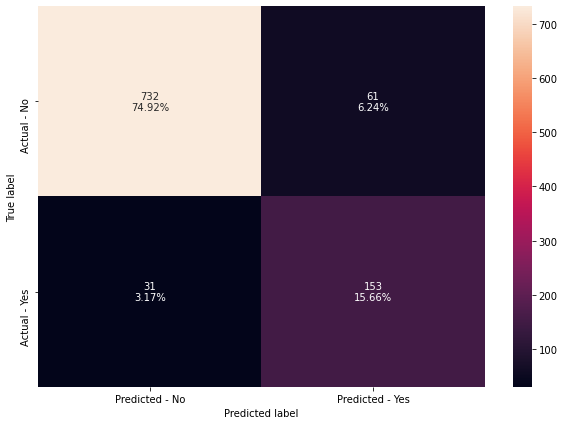

In [129]:
# confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

In [130]:
# feature importance
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                  Imp
Passport                     0.130389
Designation_Executive        0.067872
Designation_Manager          0.048974
MaritalStatus_Single         0.042887
MaritalStatus_Unmarried      0.042504
CityTier                     0.041359
NumberOfFollowups            0.036926
ProductPitched_Standard      0.036292
MaritalStatus_Married        0.035902
PreferredPropertyStar        0.035815
PitchSatisfactionScore       0.034714
TypeofContact_Self Enquiry   0.034411
MonthlyIncome                0.033432
DurationOfPitch              0.030815
ProductPitched_Deluxe        0.030620
Occupation_Large Business    0.029201
NumberOfTrips                0.029116
ProductPitched_Super Deluxe  0.029002
Gender_Male                  0.028090
ProductPitched_King          0.026750
Age                          0.026618
Designation_VP               0.023253
OwnCar                       0.023184
Designation_Senior Manager   0.022769
Occupation_Small Business    0.022381
NumberOfPers

This model has the highest recall, although it is still overfitting the training data. It is worth noting that the GridSearch algorithm took a substantial amount of time to run, it is a possibility that the extra performance is not worth the extra computational time. Interestingly, this model has feature importances that are different than any other model built so far with passport status, designation, and marital status as the most important features.

### Stacking Model

In [138]:
estimators = [('Decision Tree', dtree_tuned),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned), ('Adaboost', abc_tuned)]
final_estimator = xgb_tuned

In [139]:
stacking_estimator = StackingClassifier(estimators = estimators, final_estimator = final_estimator, cv = 5)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.8,
                                                                     1: 0.2},
                                                       min_impurity_decrease=1e-05,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.8,
                                                                     1: 0.2},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=150,
                                                       random_state=1)),
              

In [140]:
# metrics scores
stacking_estimator_score = get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9746608651138982
Accuracy on test set :  0.8894575230296827
Recall on training set :  0.9891304347826086
Recall on test set :  0.7880434782608695
Precision on training set :  0.8888888888888888
Precision on test set :  0.677570093457944


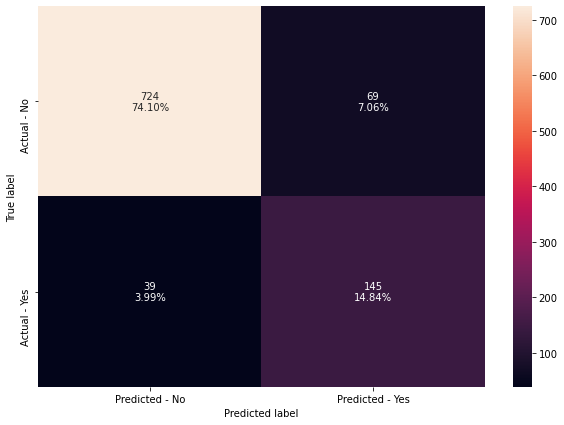

In [141]:
# confusion matrix
make_confusion_matrix(stacking_estimator, y_test)

This stacking model had pretty similar performance in terms of recall to the XGBoost tuned model. However, we used that model as a part of the stacking estimator and it performed slightly better on its own, so we would pick the XGBoost tuned model over this one.

### Boosting Model Comparison

In [144]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [145]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned', 'Stacking Estimator'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.84,0.35,0.33,0.69,0.64
1,AdaBoost Tuned,0.97,0.88,0.88,0.66,0.93,0.69
2,Gradient Boosting with default parameters,0.89,0.86,0.48,0.39,0.87,0.77
3,Gradient Boosting with init=AdaBoost,0.89,0.87,0.49,0.41,0.86,0.78
4,Gradient Boosting Tuned,0.92,0.88,0.63,0.49,0.94,0.80
5,XGBoost with default parameters,1.00,0.93,1.00,0.73,1.00,0.88
6,XGBoost Tuned,0.98,0.91,1.00,0.83,0.89,0.71
7,Stacking Estimator,0.97,0.89,0.99,0.79,0.89,0.68


Overall, the boosting models seem to outperform the bagging models. All the bagging models overfit the training data by quite a lot, while some of the boosting models like Adaboost and gradient boosting reduced the overfitting to some extent. However, when tuning the models, most of the boosting algorithms created models that performed much better in terms of recall score, but started to overfit the data just as much as the bagging models. The tuned XGBoost model seems to have the best balance between performance and overfitting, but it was still overfitting in the end. The tuned XGBoost model also took considerably longer to hyperparameter tune than the others. All the boosting algorithms generated models with over 80% accuracy, but the XGBoost models still outperformed the rest with over 90% accuracy. The bagging models also all had high accuracies of over 90%, but were significantly less on test data recall scores. The tuned random forest model managed to reduce overfitting, but at a great cost of accuracy as it had the lowest test recall score out of all the models. 

## Insights & Recommendations

- Since the Tuned XGBoost model previded the highest test recall, we can use that model's feature importance as an indicator of what factors are important in determining whether or not a customer will purchase a tourism package.
    - According to that model, the most important features are passport status, designation, and marital status, particularly whether or not a customer is an executive or manager, or single or unmarried.
    - Executive and manager designation customers tend to be more wealthy and have a higher standard of living making them more likely to purchase some of the higher tier packages like super deluxe and king packages, although they are the lowest designations in this dataset. They would tend to be relatively young customers and be more likely to be interested in travel packages. Single or unmarried customers are more likely to purchase the lower level packages like basic or standard, which tend to sell the most.
    - The company can use this information to choose which customers to target with packages based on these features. If the new wellness tourism package is a more luxurious package, it could be targeted to customers who are executives or managers. The company can also try to segment their customer base by customers who travel internationally and those who only travel domestically using passport status and offer tourism packages tailored to each group.
- It is important to note that almost all the bagging classifiers had Age, Monthly Income, and Duration of Pitch as the most important features. 
    - Age and monthly income likely go hand in hand with designations like executive and manager as older, more wealthy customers would hold those positions.
    - Duration of pitch is an important feature as people in higher positions like executive would not have time to listen to sales pitches, and would likely reject the package if the pitch took too long.
    - The company can use this information to take caution to keep pitches to executives and managers short in order to increase the likelihood of them purchasing the package. 